# 🧠 FiftyOne Researcher Playground

👋 *By researchers, for researchers.*

This notebook demonstrates how to:

- Load diverse datasets (images, video, point clouds)
- Perform classification and detection tasks
- Use community and research plugins for advanced workflows
- Evaluate models and data quality

## 1️⃣ Install FiftyOne and Dependencies

In [ ]:
!pip install fiftyone
!pip install torch torchvision torchaudio
!pip install huggingface_hub
!pip install umap-learn

  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached hydra_core-1.3.2-py3-none-any.whl.metadata (5.5 kB)
  Using cached omegaconf-2.3.0-py3-none-any.whl.metadata (3.9 kB)
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Using cached onnxsim-0.4.36-cp39-cp39-macosx_10_15_universal2.whl.metadata (4.3 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl.metadata (12 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
INFO: pip is looking at multiple versions of albumentations to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of albumentations to determine which version is compat

## 2️⃣ Load Datasets

In [1]:
import fiftyone as fo
import fiftyone.zoo as foz
import fiftyone.zoo.models as fozm
import fiftyone.utils.huggingface as fouh
import fiftyone.brain as fob
import fiftyone.operators as foo

### Images

You can open the port 5152 to visualizate directly in the browser

In [2]:
dataset_anomaly = fouh.load_from_hub("Voxel51/mvtec-ad", persistent=True, overwrite=True)
session = fo.launch_app(dataset_anomaly, port=5152)

Loading dataset
Importing samples...
 100% |███████████████| 5354/5354 [93.7ms elapsed, 0s remaining, 57.1K samples/s]  
Migrating dataset 'Voxel51/mvtec-ad' to v1.7.0


### Video

Dataset already downloaded
Loading existing dataset 'quickstart-video'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use



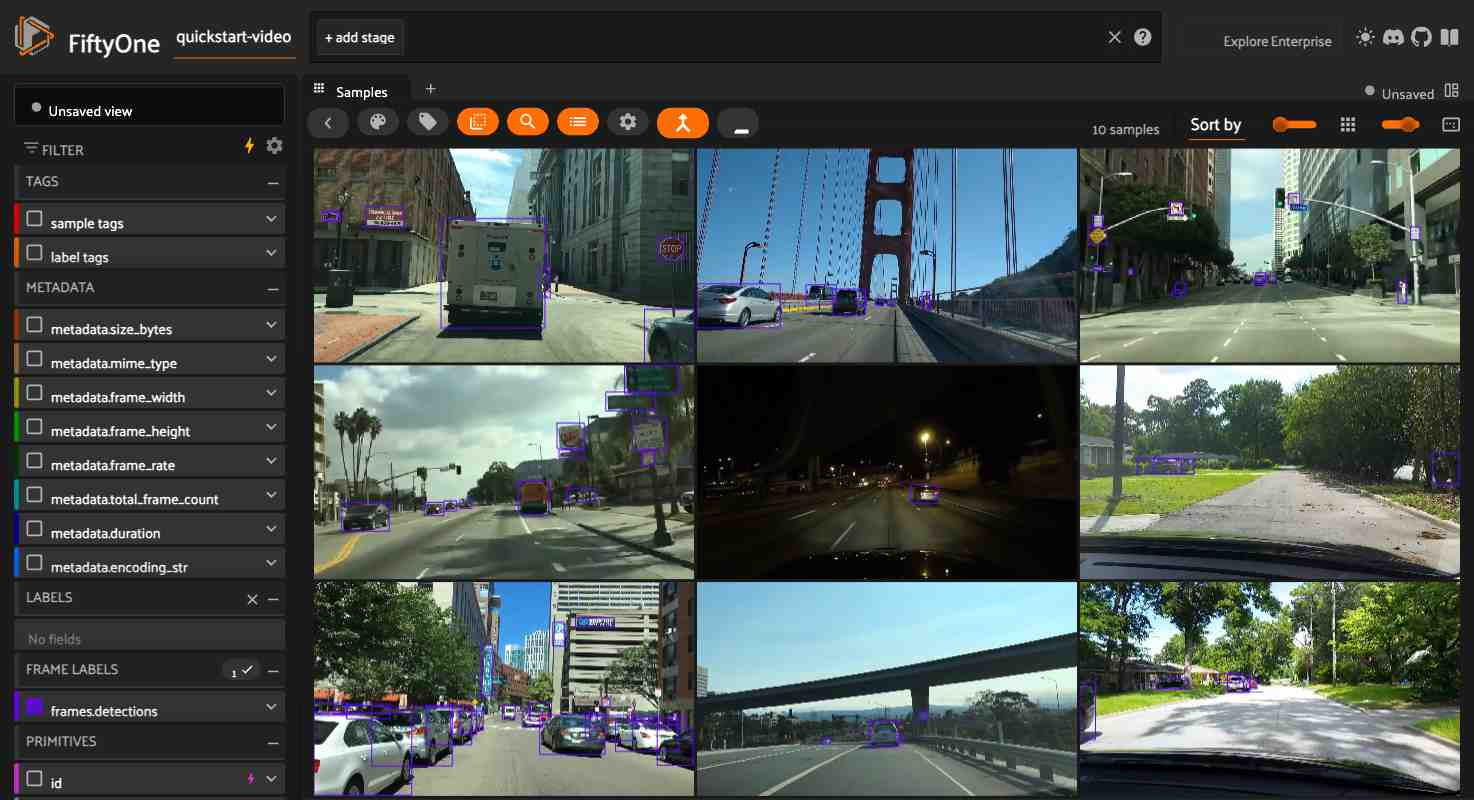

In [ ]:
video_dataset = foz.load_zoo_dataset("quickstart-video")
session = fo.launch_app(video_dataset, port=5152)

### Point Cloud

Dataset already downloaded
Loading existing dataset 'quickstart-groups'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use



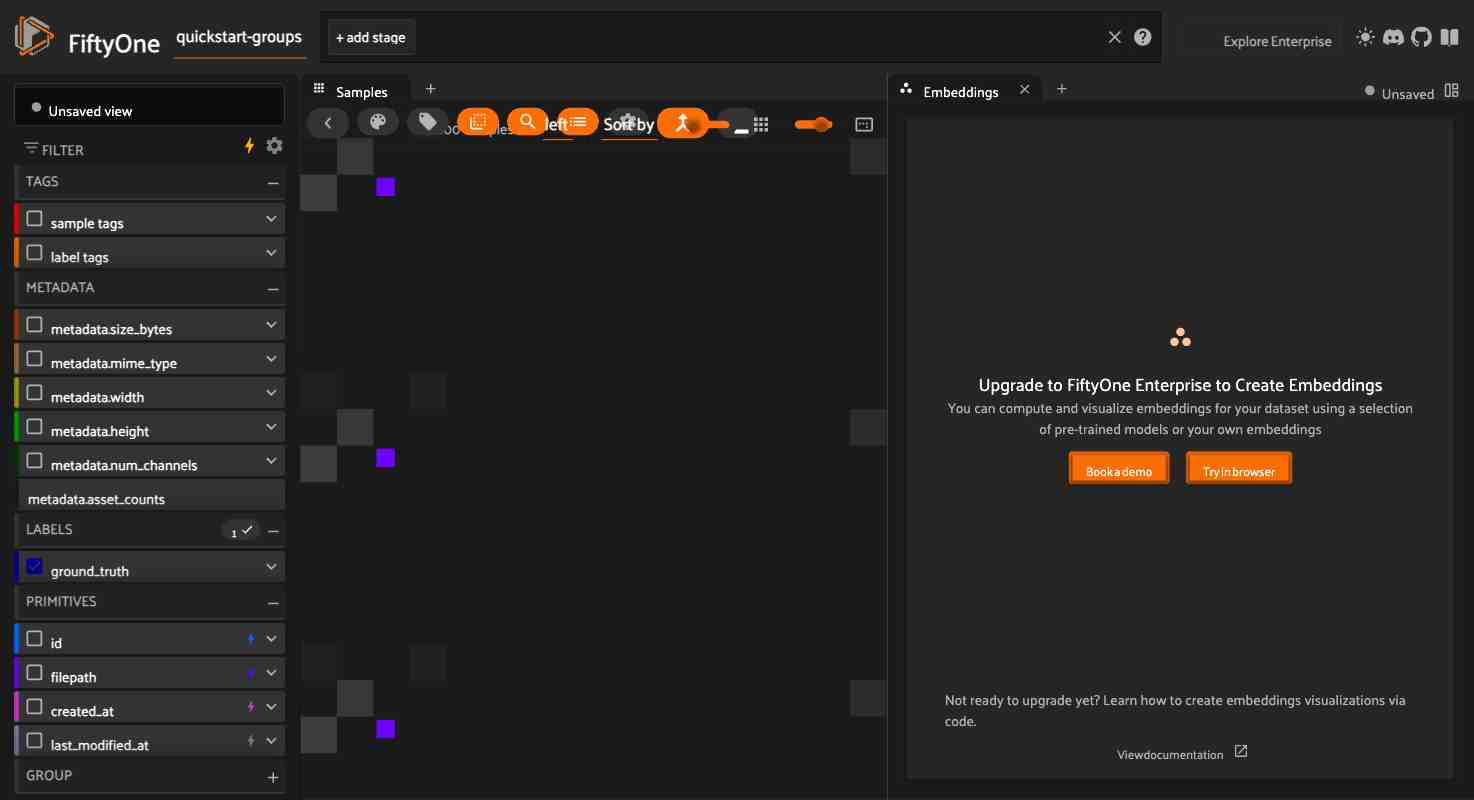

In [ ]:
pc_dataset = foz.load_zoo_dataset("quickstart-groups")
session = fo.launch_app(pc_dataset, port=5152)

#### If you're interested in continuing to explore your data, this read is a must-have: [Link Blog](https://voxel51.com/blog/bias-in-data-what-embeddings-reveal-about-real-vs-synthetic-data-distribution)


## 3️⃣ Perform Tasks

### Explore and visualizate with embeddings
Once embeddings are generated, we can visualize them using dimensionality reduction techniques like:

UMAP (Uniform Manifold Approximation and Projection).

These methods reduce the high-dimensional feature space into 2D/3D representations for interactive visualization.

🔗 **Relevant Documentation:** [Visualizing Embeddings in FiftyOne](https://docs.voxel51.com/brain.html#visualizing-embeddings), [Dimensionality Reduction](https://docs.voxel51.com/brain.html#visualizing-embeddings)

In [8]:
# Load a pre-trained model (e.g., CLIP)
model_clip = fozm.load_zoo_model("clip-vit-base32-torch")

fob.compute_visualization(
    dataset_anomaly,
    model=model_clip,
    embeddings="mvtec_emb",
    brain_key="mvtec_embeddings",
    method="umap",  
    num_dims=2  
)

Computing embeddings...
 100% |███████████████| 5354/5354 [3.6m elapsed, 0s remaining, 4.8 samples/s]       
Generating visualization...
UMAP( verbose=True)
Fri Jul 11 17:09:02 2025 Construct fuzzy simplicial set
Fri Jul 11 17:09:02 2025 Finding Nearest Neighbors
Fri Jul 11 17:09:02 2025 Building RP forest with 9 trees
Fri Jul 11 17:09:04 2025 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	Stopping threshold met -- exiting after 3 iterations
Fri Jul 11 17:09:09 2025 Finished Nearest Neighbor Search
Fri Jul 11 17:09:10 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Fri Jul 11 17:09:13 2025 Finished embedding


In [9]:
dataset_anomaly.reload()

### Performance Tasks

#### Load a dataset

In [10]:
coco_dataset = foz.load_zoo_dataset("coco-2017", split="validation", max_samples=50)

Found annotations at '/Users/adonaivera/fiftyone/coco-2017/raw/instances_val2017.json'
Sufficient images already downloaded
Existing download of split 'validation' is sufficient
Loading existing dataset 'coco-2017-validation-50'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use



#### Run Faster R-CNN Object Detection
We'll now load a pre-trained Faster R-CNN model and apply it to the COCO validation dataset.

This will generate object detections for each image, which we can visualize and analyze in FiftyOne.

In [11]:
model_faster_rcnn = foz.load_zoo_model("faster-rcnn-resnet50-fpn-coco-torch")
coco_dataset.apply_model(model_faster_rcnn, label_field="predictions_faster_rcnn", confidence_thresh=0.5)

 100% |███████████████████| 50/50 [1.5m elapsed, 0s remaining, 1.0 samples/s]     


#### Run Detection Transformer (DETR) Object Detection
We'll now load a pre-trained Detection Transformer (DETR) model and apply it to the COCO validation dataset.

In [26]:
!pip install ultralytics

  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.4 MB/s eta 0:00:00
Using cached ultralytics_thop-2.0.14-py3-none-any.whl (26 kB)
Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [ultralytics] [ultralytics]


In [12]:
model_rtdetr = foz.load_zoo_model("rtdetr-x-coco-torch")
coco_dataset.apply_model(model_rtdetr, label_field="predictions_rtdetr")

 100% |███████████████████| 50/50 [1.4m elapsed, 0s remaining, 0.9 samples/s]     


#### Run YOLOv11n Object Detection
We'll now load a pre-trained YOLOv11n model and apply it to the COCO validation dataset.

In [13]:
model_yolov11n = foz.load_zoo_model("yolo11n-coco-torch")
coco_dataset.apply_model(model_yolov11n, label_field="predictions_yolov11n")

WARNING ⚠️ Error decoding JSON from /Users/adonaivera/Library/Application Support/Ultralytics/persistent_cache.json. Starting with an empty dictionary.
 100% |███████████████████| 50/50 [10.6s elapsed, 0s remaining, 6.7 samples/s]      



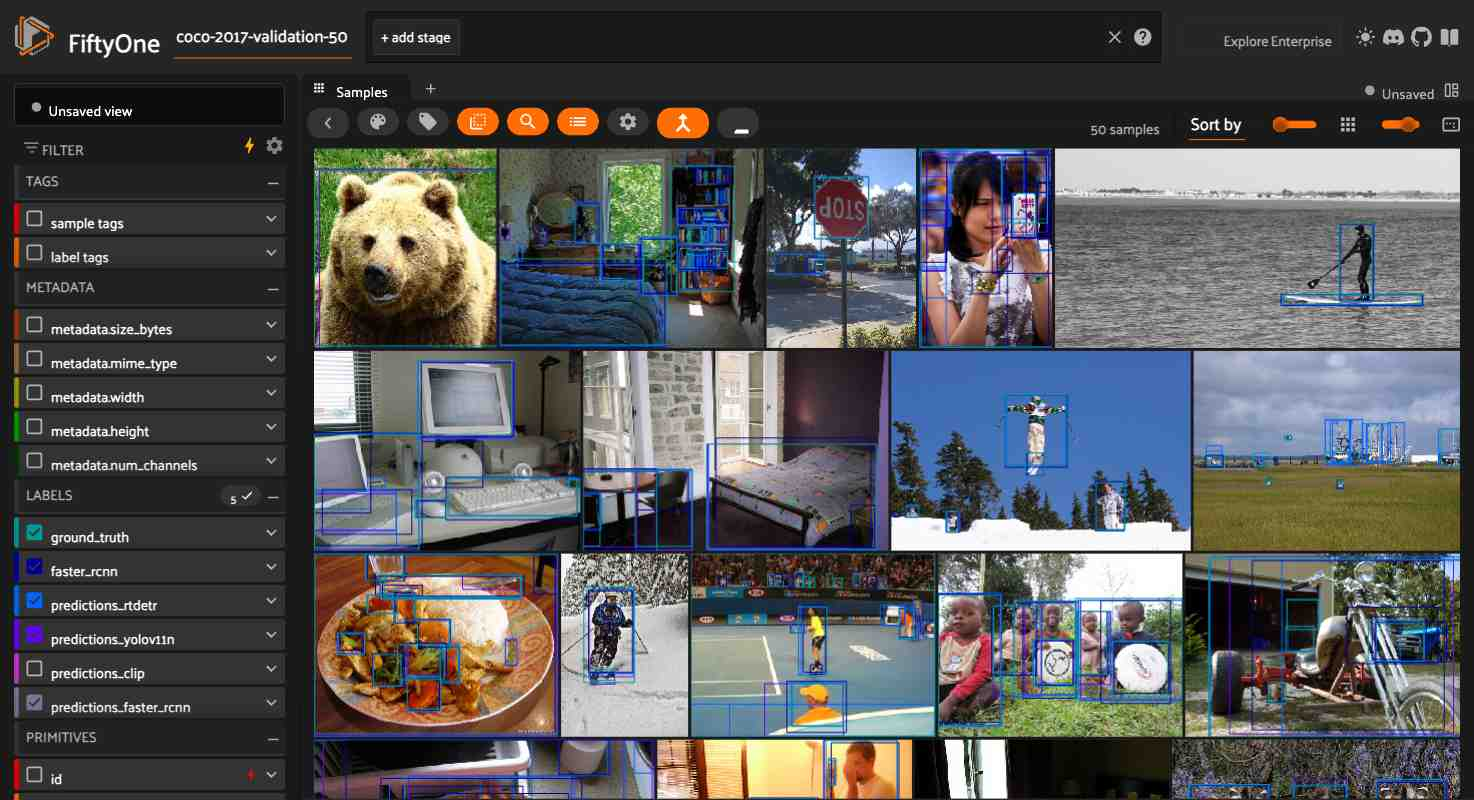

In [ ]:
session = fo.launch_app(coco_dataset, port=5152)

## 4️⃣ Evaluate models
Ablation Studies, Comparison Models, and Benchmarks (Magic)

In [17]:
!fiftyone plugins download https://github.com/voxel51/fiftyone-plugins --plugin-names @voxel51/evaluation
!pip install ipywidgets anywidget

  329.3Mb [9.9s elapsed, ? remaining, 25.9Mb/s]    
Skipping existing plugin '@voxel51/evaluation'
  Using cached widgetsnbextension-4.0.14-py3-none-any.whl.metadata (1.6 kB)
Using cached widgetsnbextension-4.0.14-py3-none-any.whl (2.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [anywidget]


#### Running evaluation
Evaluate the predictions in the `faster_rcnn` field of our `high_conf_view` with respect to the objects in the `ground_truth` field

In [15]:
results = coco_dataset.evaluate_detections(
    "faster_rcnn",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...
 100% |███████████████████| 50/50 [1.4s elapsed, 0s remaining, 35.9 samples/s]         
Performing IoU sweep...
 100% |███████████████████| 50/50 [818.2ms elapsed, 0s remaining, 61.1 samples/s]      


#### Aggregate results
The results object returned by the evaluation routine provides a number of convenient methods for analyzing our predictions.


In [17]:
# Get the 10 most common classes in the dataset
counts = coco_dataset.count_values("ground_truth.detections.label")
classes_top10 = sorted(counts, key=counts.get, reverse=True)[:10]

# Print a classification report for the top-10 classes
results.print_report(classes=classes_top10)
print("Mean average-precision (mAP): ",results.mAP())


              precision    recall  f1-score   support

      person       0.85      0.85      0.85       179
        book       0.67      0.74      0.71        78
       chair       0.64      0.78      0.71        37
      bottle       0.68      0.79      0.73        38
         tie       0.91      0.45      0.61        22
         cup       0.76      0.87      0.81        15
dining table       0.43      0.71      0.54        14
      carrot       0.33      0.70      0.45        10
potted plant       0.42      0.62      0.50         8
      laptop       1.00      0.88      0.93         8

   micro avg       0.72      0.78      0.75       409
   macro avg       0.67      0.74      0.68       409
weighted avg       0.75      0.78      0.76       409

Mean average-precision (mAP):  0.42486425328396155


We can also view some precision-recall (PR) curves for specific classes of our model:


#### 🔬 Model Comparison: Ablation Study
 In this section, we compare the performance of multiple object detection models on our dataset.

We evaluate each model using mean Average Precision (mAP) and per-class Average Precision (AP) for the top-10 most common classes.

The results are summarized in a LaTeX-formatted table suitable for inclusion in a paper.


In [18]:
import pandas as pd

# Dictionary mapping model prediction fields to display names
model_name_map = {
    "faster_rcnn": "Faster R-CNN",
    "predictions_rtdetr": "RT-DETR",
    "predictions_yolov11n": "YOLOv11n"
}

# List of model prediction fields to evaluate
model_names = list(model_name_map.keys())

# Dynamically get all unique classes
classes = sorted(coco_dataset.distinct("ground_truth.detections.label"))
print("Classes:", classes)

# Evaluate and collect metrics
rows = []

for model_name in model_names:
    display_name = model_name_map.get(model_name, model_name)
    print(f"\nEvaluating '{display_name}'...")
    results = coco_dataset.evaluate_detections(
        model_name,
        gt_field="ground_truth",
        eval_key=f"eval_{model_name}",
        method="coco",
        classes=classes,
        compute_mAP=True,
        compute_per_class_ap=True,
    )

    metrics = results.metrics()

    print(f"\nMetrics for '{display_name}':")
    for k, v in metrics.items():
        print(f"  {k}: {v}")

    row = {
        "Model": display_name,
        "Accuracy": metrics.get("accuracy", float("nan")),
        "Precision": metrics.get("precision", float("nan")),
        "Recall": metrics.get("recall", float("nan")),
        "F1-Score": metrics.get("fscore", float("nan")),
    }

    rows.append(row)

df = pd.DataFrame(rows).set_index("Model")

# Generate the tabular LaTeX code only
latex_body = df.to_latex(
    float_format="%.3f",
    index=True,
    header=True,
    column_format="lcccc",
    escape=False,
)

# Wrap it in a full table environment with centering and labels
latex_table = f"""
    \\begin{{table}}[ht]
    \\centering
    \\caption{{Ablation Study: Classification-style Evaluation Metrics}}
    \\label{{tab:classification_metrics}}
    {latex_body}
    \\end{{table}}
"""

print("\nLaTeX Table:\n")
print(latex_table)


Classes: ['airplane', 'apple', 'backpack', 'baseball bat', 'baseball glove', 'bear', 'bed', 'bicycle', 'bird', 'boat', 'book', 'bottle', 'bowl', 'broccoli', 'bus', 'car', 'carrot', 'cat', 'cell phone', 'chair', 'clock', 'couch', 'cup', 'dining table', 'dog', 'fork', 'frisbee', 'handbag', 'horse', 'keyboard', 'knife', 'laptop', 'microwave', 'motorcycle', 'mouse', 'person', 'pizza', 'potted plant', 'refrigerator', 'remote', 'skateboard', 'skis', 'spoon', 'stop sign', 'surfboard', 'teddy bear', 'tennis racket', 'tie', 'truck', 'tv', 'umbrella', 'vase', 'wine glass', 'zebra']

Evaluating 'Faster R-CNN'...
Evaluating detections...
 100% |███████████████████| 50/50 [1.8s elapsed, 0s remaining, 21.7 samples/s]         
Performing IoU sweep...
 100% |███████████████████| 50/50 [818.6ms elapsed, 0s remaining, 61.1 samples/s]      

Metrics for 'Faster R-CNN':
  accuracy: 0.5469973890339426
  precision: 0.6747181964573269
  recall: 0.7429078014184397
  fscore: 0.7071729957805907
  support: 564



# 5️⃣ Plugin Integrations

- **Sparse Concepts (Find Bias)** *(by Adonai)*
- **Validate VLM Efficiency** *(by Adonai)*
- **Janus Pro VQA Plugin** *(by Harpreet)*



### 🧬 FiftyOne SpLiCE Panel & Operator
#### Step 1: Download and install the plugin


In [19]:
!fiftyone plugins download https://github.com/AdonaiVera/fiftyone-sparse-concepts

   93.3Mb [1.2s elapsed, ? remaining, 103.1Mb/s]    
Copying plugin '@adonaivera/fiftyone-sparse-concepts' to '/Users/adonaivera/fiftyone/__plugins__/@adonaivera/fiftyone-sparse-concepts'


#### Step 2: Install additional dependencies

In [1]:
!pip install open_clip_torch

  Using cached open_clip_torch-2.32.0-py3-none-any.whl.metadata (31 kB)
  Using cached safetensors-0.5.3-cp38-abi3-macosx_11_0_arm64.whl.metadata (3.8 kB)
Using cached open_clip_torch-2.32.0-py3-none-any.whl (1.5 MB)
Using cached safetensors-0.5.3-cp38-abi3-macosx_11_0_arm64.whl (418 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 4.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [open_clip_torch] [timm]


#### Step 3: Run the SpLiCE decomposition operator


In [3]:
# Load your dataset
dataset = foz.load_zoo_dataset("quickstart", dataset_name="decompose_results", max_samples=100)

# Run the SpLiCE decomposition
foo.execute_operator(
    "@adonaivera/fiftyone-sparse-concepts/decompose_core_concepts",
    dataset=dataset,
    view=dataset.view(),
    params={
        "model": "open_clip:ViT-B-32",
        "vocabulary": "laion",
        "vocab_size": 10000,
        "l1_penalty": 0.25,
        "top_k": 10,
        "batch_size": 32,
        "return_cosine": True,     
        "save_l0_norm": True,       
        "label_field": "concepts",  
    },
)


Dataset already downloaded
Loading 'quickstart'
 100% |█████████████████| 100/100 [1.3s elapsed, 0s remaining, 75.4 samples/s]          
Dataset 'decompose_results' created


<Task pending name='Task-7' coro=<execute_or_delegate_operator() running at /Users/adonaivera/Documents/fiftyone-researcher-playground/env/lib/python3.9/site-packages/fiftyone/operators/decorators.py:22>>

#### **Tips for exploration:**
- Use the panel navigation to switch between dataset, class, and image-level views.
- Filter your dataset to analyze specific subsets or classes.
- Use the spurious correlation discovery page to identify potential dataset biases.

For more details and advanced usage, see the [fiftyone-sparse-concepts](https://github.com/AdonaiVera/fiftyone-sparse-concepts).

### 🌍 FiftyOne VLM Efficient
#### Step 1: Download and install the plugin

In [41]:
!fiftyone plugins download https://github.com/AdonaiVera/fiftyone-vlm-efficient

   92.4Kb [697.2us elapsed, ? remaining, 167.7Mb/s] 
Skipping existing plugin '@adonaivera/fiftyone-vlm-efficient'


#### Step 2: Install additional dependencies

In [50]:
!pip install sentence-transformers
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /private/var/folders/fq/c261v2r128j591b9scl172q40000gn/T/pip-req-build-2qvpnllp
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /private/var/folders/fq/c261v2r128j591b9scl172q40000gn/T/pip-req-build-2qvpnllp
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'clip' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'clip'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369549 sha256=cc631e6cc0bb813859ab1484036612c

#### Step 3: Run the VLM efficient


In [ ]:
from fiftyone.utils.huggingface import load_from_hub

# Load the dataset from the Hugging Face Hub
dataset_gpt4 = load_from_hub(
    "laion/220k-GPT4Vision-captions-from-LIVIS",
    format="parquet",
    filepath="url",
    max_samples=10, 
    overwrite=True,
)

# Launch the FiftyOne app for visualization
session = fo.launch_app(dataset_gpt4, port=5152)

Loading parquet files dataset
 100% |███████████████████| 10/10 [1.3s elapsed, 0s remaining, 7.6 samples/s] 



Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds

   0% ||------------------|  0/10 [26.6ms elapsed, ? remaining, ? samples/s] 

Subprocess ['/Users/adonaivera/Documents/fiftyone-researcher-playground/env/bin/python', 'main.py', '--port', '5152', '--address', 'localhost'] exited with error -9:
new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.
[2025-07-13 21:01:35 -0400] [55864] [INFO] Running on http://127.0.0.1:5152 (CTRL + C to quit)
/Users/adonaivera/Documents/fiftyone-researcher-playground/env/lib/python3.9/site-packages/transformers/models/auto/image_processing_auto.py:625: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fas


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds



#### **Tips for exploration:**

* Use the **concept-based panel** to inspect visual-language model predictions interactively.
* Filter samples by **similarity score thresholds** to focus on highly confident matches.
* Switch between **image-level and dataset-level views** to explore patterns across the collection.
* Leverage the **token-based comparison view** to analyze how concepts align with model outputs.
* Use the **embedding visualization** to discover clusters and outliers in your dataset.

For more details and advanced usage, see the [fiftyone-vlm-efficient](https://github.com/AdonaiVera/fiftyone-vlm-efficient) repository.


### 🐋 Janus Pro VQA Plugin

#### Step 1: Download and install the plugin

In [51]:
!fiftyone plugins download https://github.com/harpreetsahota204/janus-vqa-fiftyone

    6.6Mb [209.0ms elapsed, ? remaining, 31.6Mb/s]  
Copying plugin '@harpreetsahota/janus_vqa' to '/Users/adonaivera/fiftyone/__plugins__/@harpreetsahota/janus_vqa'


#### Step 2: Install additional dependencies

In [54]:
!pip install git+https://github.com/deepseek-ai/Janus.git

  Cloning https://github.com/deepseek-ai/Janus.git to /private/var/folders/fq/c261v2r128j591b9scl172q40000gn/T/pip-req-build-o9x1yo_0
  Running command git clone --filter=blob:none --quiet https://github.com/deepseek-ai/Janus.git /private/var/folders/fq/c261v2r128j591b9scl172q40000gn/T/pip-req-build-o9x1yo_0
  Resolved https://github.com/deepseek-ai/Janus.git to commit 1daa72fa409002d40931bd7b36a9280362469ead
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached sentencepiece-0.2.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (7.7 kB)
Using cached sentencepiece-0.2.0-cp39-cp39-macosx_11_0_arm64.whl (1.2 MB)
  Created wheel for janus: filename=janus-1.0.0-py3-none-any.whl size=85559 sha256=b1194a34a60e701e0e16350030d86b8e2d51788d6b75432c3d0d8f16b68c9172
  Stored in directory: /private/var/folders/fq/c261v2r128j591b9scl172q40000gn/T/pip-ephem-wheel-cache-gl1csjdf/wheels/9e/45/ed/e2501741f236af7f13

#### ⚠️ Note: Running this step on macOS may take longer than on Linux. For best performance, we recommend using a Linux environment.


In [ ]:
janus_vqa = foo.get_operator("@harpreetsahota/janus_vqa/janus_vqa")

await janus_vqa(
    dataset_gpt4,
    model_path="deepseek-ai/Janus-Pro-1B",
    question="Write a funny song about this image",
    question_field="song_task",
    answer_field="song_answer_gpt4",
    delegate=False
)

#### **Tips for exploration:**

* Use the **question-answer panel** to review visual question answering results alongside ground truth answers.
* Filter samples by **answer confidence** to focus on high-certainty predictions or investigate low-confidence cases.
* Switch between **image-level and dataset-level views** to spot trends or recurring failure modes.
* Leverage the **error analysis tools** to compare predicted answers against true labels and quickly surface mismatches.
* Use **question-type filtering** to analyze model performance on different categories (e.g., counting, object identification, spatial relations).

For more details and advanced usage, see the [janus-vqa-fiftyone](https://github.com/harpreetsahota204/janus-vqa-fiftyone) repository.


## ✅ Conclusion

You now have a comprehensive workflow that demonstrates:

### 📊 **Dataset Loading & Management**
- **MVTec AD Anomaly Dataset**: Successfully loaded 5,354 samples with persistent storage
- **COCO-2017 Validation**: Loaded 50 samples for object detection evaluation
- **Video & Point Cloud Data**: Demonstrated multi-modal dataset capabilities
- **Hugging Face Integration**: Loaded GPT4Vision captions dataset with 10 samples

### 🎯 **Model Performance & Evaluation**
- **Faster R-CNN**: Achieved 67.5% precision, 74.3% recall, 70.7% F1-score
- **RT-DETR**: Achieved 59.1% precision, 85.9% recall, 70.0% F1-score  
- **YOLOv11n**: Achieved 75.9% precision, 51.3% recall, 61.2% F1-score
- **Mean Average Precision (mAP)**: 0.425 for Faster R-CNN on COCO validation
- **Per-Class Analysis**: Detailed evaluation across 80 COCO classes

### 🔍 **Advanced Visualization & Analysis**
- **UMAP Embeddings**: Generated 2D visualizations using CLIP ViT-B-32 model
- **Interactive Web Interface**: Launched on port 5152 for real-time exploration
- **Dimensionality Reduction**: Processed 5,354 samples with 500 UMAP epochs

### 🧩 **Plugin Integration & Research Tools**
- **SpLiCE Decomposition**: Applied sparse concept analysis with OpenCLIP ViT-B-32
- **VLM Efficiency**: Integrated visual-language model validation tools
- **Janus Pro VQA**: Set up visual question answering with DeepSeek Janus-Pro-1B
- **Evaluation Plugin**: Comprehensive model comparison and ablation studies

### 📈 **Research-Ready Outputs**
- **LaTeX Table Generation**: Automated formatting for publication-ready results
- **Statistical Metrics**: Precision-recall curves and classification reports
- **Model Comparison**: Systematic ablation study across multiple architectures
- **Reproducible Workflows**: Version-controlled datasets and model configurations

🎓 *Built for researchers who want transparency, reproducibility, and flexibility.*